In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [ ]:
#한글 깨짐 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 실행

In [18]:
game=pd.read_csv('vgames2.csv',index_col = 0)
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 배급한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

### 데이터 전처리

In [19]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


##### 결측치 제거
- 결측치가 있는 행은 제거한다.

In [20]:
game.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [21]:
game=game.dropna(axis=0)

##### Year 처리
- Year의 data type을 float -> int로 변환해야 한다.

In [22]:
game['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [23]:
game['Year']=game['Year'].round(0).astype(int)

<ipython-input-23-6dbf20caf7a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['Year']=game['Year'].round(0).astype(int)


In [24]:
game[game['Year']<1900]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
82,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
214,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
769,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
16104,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
16150,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16395,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


- 연도가 1900보다 작은 것은 이상치이므로 삭제해야 한다.

In [25]:
game= game[game.Year >= 1900]
game.Year.value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
2006     998
2005     930
2002     823
2003     767
2004     736
2012     650
2015     606
2014     578
2013     543
2001     478
1998     374
2000     345
2016     337
1999     336
1997     287
1996     259
1995     215
1994     120
1993      60
1981      46
1992      43
1991      41
1982      36
1986      20
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

##### 출고량 처리
- 지역별 출고량에서 기본 단위는 1M=1000000
- 지역별 출고량(NA_Sales, EU_Sales, JP_Sales, Other_Sales)의 data type을 object -> float로 변환해야 한다.
- 지역별 출고량에서 K단위로 존재하고 있는 값은 M단위로 변환해야 한다.
- 1M=1000000 / 1K=1000

In [26]:
def tofloat(columns):
  change = columns
  if 'K' in change:
    change=float(change.replace('K',''))
    return change/1000
  elif 'M' in change:
    change=float(change.replace('M',''))
    return change
  else:
    return float(change)

In [27]:
game['NA_Sales']= game.NA_Sales.apply(tofloat)
game['EU_Sales']= game.EU_Sales.apply(tofloat)
game['JP_Sales']= game.JP_Sales.apply(tofloat)
game['Other_Sales']= game.Other_Sales.apply(tofloat)

##### 전처리 완료된 game 데이터셋 확인

In [28]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16141 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16141 non-null  object 
 1   Platform     16141 non-null  object 
 2   Year         16141 non-null  int64  
 3   Genre        16141 non-null  object 
 4   Publisher    16141 non-null  object 
 5   NA_Sales     16141 non-null  float64
 6   EU_Sales     16141 non-null  float64
 7   JP_Sales     16141 non-null  float64
 8   Other_Sales  16141 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [29]:
game.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [30]:
game=game.reset_index(drop=True)
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16137,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16138,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 지역에 따라서 선호하는 게임 장르가 다를까

- NA, EU, JP,Other 중 출고량이 제일 많은 지역을 각 게임의 지역으로 설정했다.

In [31]:
region=game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
game['region']=region.idxmax(axis=1)
game['region']=game['region'].str.replace('_Sales','')

In [32]:
prefer=game.groupby(['region','Genre'])['Name'].count()
prefer['NA'].sort_values(ascending=False)

Genre
Action          2046
Sports          1551
Misc            1041
Shooter          924
Racing           895
Platform         693
Role-Playing     592
Simulation       504
Fighting         492
Adventure        444
Puzzle           370
Strategy         256
Name: Name, dtype: int64

Other지역에는 Puzzle, Strategy 장르가 존재하지 않는다.
- NA 지역의 선호 게임 장르 : **Action** -> Sports -> Misc -> Shooter -> Racing -> Platform -> Role-Playing -> Simulation -> Fighting -> Adventure -> Puzzle -> Strategy
- EU 지역의 선호 게임 장르 : **Action** -> Sports -> Racing -> Shooter -> Strategy -> Misc -> Adventure -> Simulation -> Role-Playing -> Puzzle -> Platform -> Fighting
- JP 지역의 선호 게임 장르 : **Role-Playing** -> Adventure -> Action -> Misc -> Sports -> Fighting -> Strategy -> Simulation -> Shooter -> Puzzle -> Platform -> Racing
- Other 지역의 선호 게임 장르 : **Action** -> Misc -> Sports -> Racing -> Fighting -> Platform -> Role-Playing -> Simulation -> Adventure -> Shooter


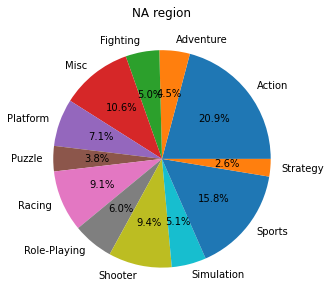

In [33]:
plt.figure(figsize=(5,5))
plt.pie(prefer['NA'],labels=prefer['NA'].index.sort_values(), autopct='%.1f%%')
plt.title("NA region")
plt.show();

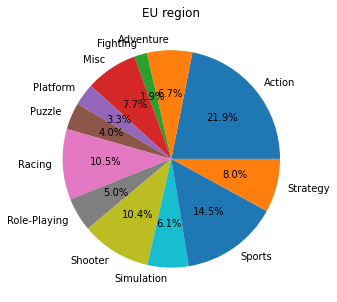

In [34]:
plt.figure(figsize=(5,5))
plt.pie(prefer['EU'],labels=prefer['EU'].index.sort_values(), autopct='%.1f%%')
plt.title("EU region")
plt.show()

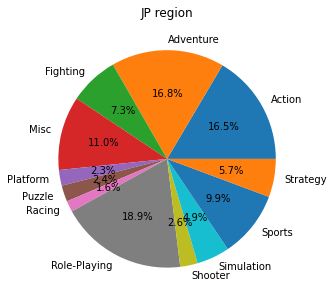

In [35]:
plt.figure(figsize=(5,5))
plt.pie(prefer['JP'],labels=prefer['JP'].index.sort_values(), autopct='%.1f%%')
plt.title("JP region")
plt.show()

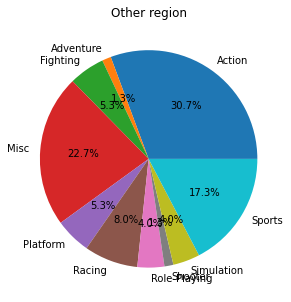

In [36]:
plt.figure(figsize=(5,5))
plt.pie(prefer['Other'],labels=prefer['Other'].index.sort_values(), autopct='%.1f%%')
plt.title("Other region")
plt.show()

- 북미(NA)지역, 유럽(EU)지역, 기타(Other)지역이 가장 선호하는 게임 장르는 Action
- 일본(JP)지역이 가장 선호하는 게임 장르는 Role-Playing
- 지역별로 선호하는 게임의 장르가 다르다.

### 연도별 게임의 트렌드가 있을까
- 트렌드는 연도별 인기 있는 게임의 장르를 이용해 파악했다.

In [37]:
game['Genre'].value_counts()

Action          3226
Sports          2289
Misc            1671
Role-Playing    1457
Shooter         1268
Adventure       1264
Racing          1209
Platform         865
Simulation       841
Fighting         829
Strategy         664
Puzzle           558
Name: Genre, dtype: int64

In [38]:
year_sort=game.sort_values(['Year']).reset_index(drop=True)

In [39]:
year_sort.groupby(['Year','Genre']).count()

Name  Platform  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Year Genre                                                                   
1980 Action           1         1          1         1         1         1   
     Fighting         1         1          1         1         1         1   
     Misc             4         4          4         4         4         4   
     Shooter          2         2          2         2         2         2   
1981 Action          25        25         25        25        25        25   
...                 ...       ...        ...       ...       ...       ...   
2016 Sports          37        37         37        37        37        37   
     Strategy        10        10         10        10        10        10   
2017 Action           1         1          1         1         1         1   
     Role-Playing     2         2          2         2         2         2   
2020 Simulation       1         1          1         1         1         1   

                   Other_Sales  region  
Year Genre                              
1980 Action                  1       1  
     Fighting                1       1  
     Misc                    4       4  
     Shooter                 2       2  
1981 Action                 25      25  
...                        ...     ...  
2016 Sports                 37      37  
     Strategy               10      10  
2017 Action                  1       1  
     Role-Playing            2       2  
2020 Simulation              1       1  

[388 rows x 8 columns]

In [40]:
year_sort.groupby('Year').count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,region
Year,,,,,,,,,
1980,8,8,8,8,8,8,8,8,8
1981,46,46,46,46,46,46,46,46,46
1982,36,36,36,36,36,36,36,36,36
1983,17,17,17,17,17,17,17,17,17
1984,14,14,14,14,14,14,14,14,14
1985,14,14,14,14,14,14,14,14,14
1986,20,20,20,20,20,20,20,20,20
1987,16,16,16,16,16,16,16,16,16
1988,15,15,15,15,15,15,15,15,15


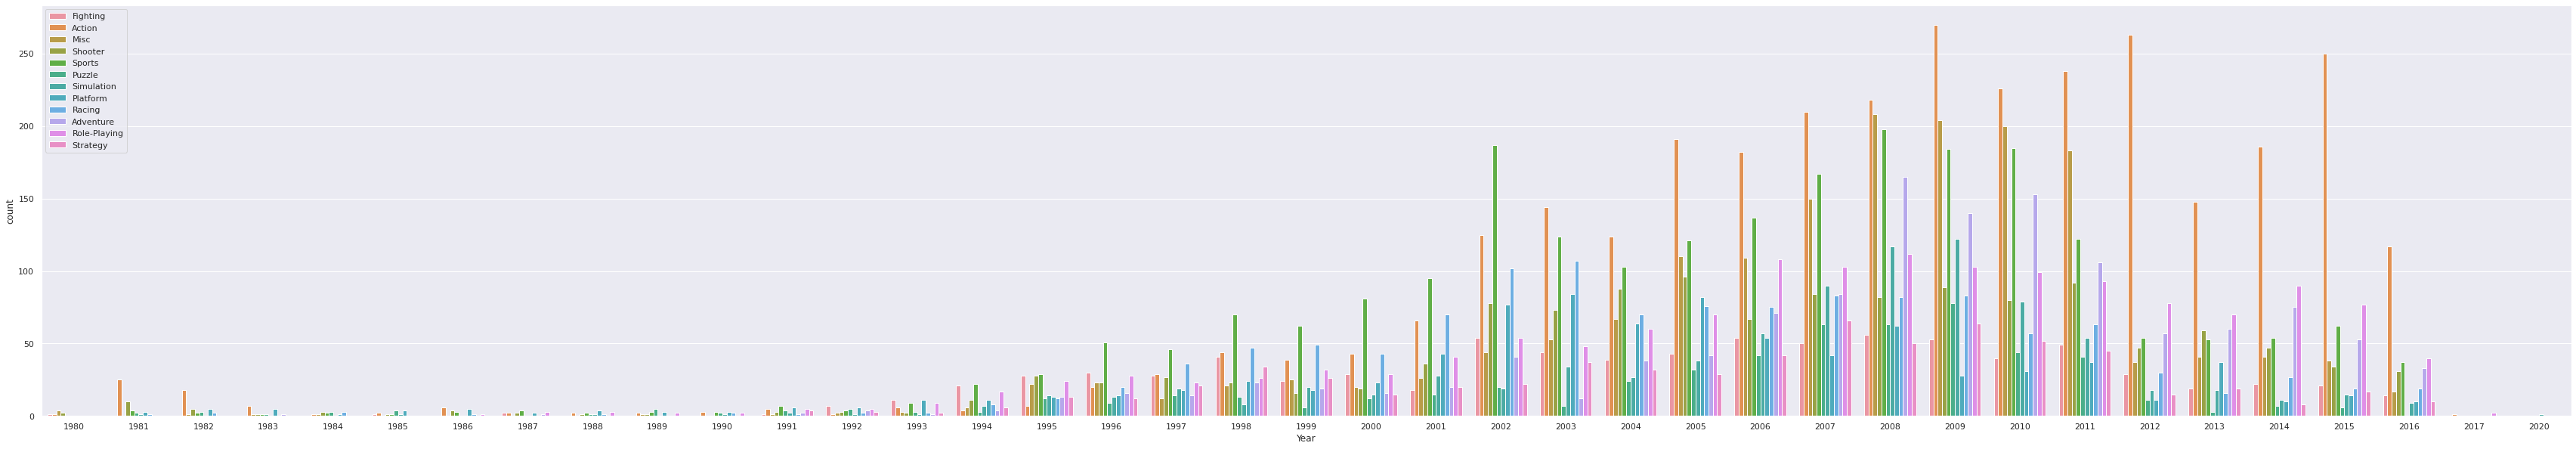

In [43]:
sns.countplot(data=year_sort,x="Year", hue="Genre")
plt.legend(loc = 'upper left')
sns.set(rc = {'figure.figsize':(80,10)})
sns.set_palette("bright")

연도별 트렌드가 존재하고 있다.
- 2002년 ~ 2011년 기간동안 전체적으로 출시된 게임의 수가 급격히 상승했다.
- 1990년대 중후반 ~ 2000년대 초반에는 Sports 장르의 게임이 가장 많이 출시되었다.
- 2000년대 초반부터 Action 장르의 출시가 급증하다가 2003년이후로 Sports를 넘어서서 가장 많이 출시되었다.
- Misc 장르는 2000년대 중반 ~ 2010년대 초반 기간동안 급격히 많이 출시되었다.

### 인기가 많은 게임에 대한 분석 및 시각화 프로세스
- 모든 지역에서의 출고량 합계를 인기가 많은 기준으로 정의했다.
- 합계 출고량이 높은 게임이 인기가 많다고 생각했다.

In [28]:
game['total_Sales'] = game['NA_Sales'] + game['EU_Sales'] + game['JP_Sales'] + game['Other_Sales']
popular_game=game.sort_values(['total_Sales'], ascending=False).reset_index(drop=True)
popular_game=popular_game[popular_game.total_Sales >= 1.0]
popular_game.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,region,total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,NA,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,NA,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,NA,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NA,31.38


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


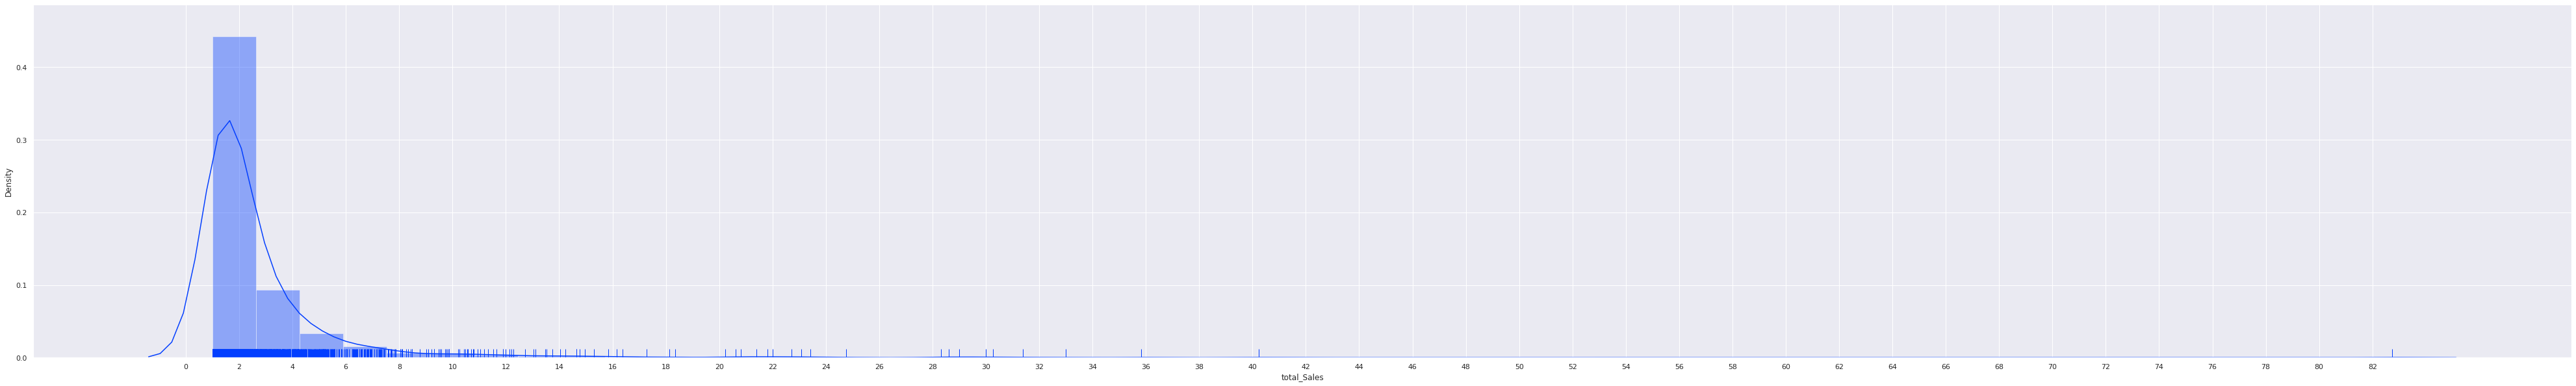

In [29]:
sns.distplot(popular_game['total_Sales'], kde=True, rug=True)
plt.xticks(np.arange(0, 83, 2))
plt.show();

- total_Sales가 12이후로 데이터 분포의 빈도가 급격히 낮아진다.
- 따라서 total_Sales >=12 인 게임이 인기가 많은 게임이라고 할 수 있다.

In [98]:
popular_game=sales[sales.total_Sales >= 12]
popular_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,region,total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,NA,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,NA,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,NA,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,NA,31.38
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,NA,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,NA,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,NA,29.01
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,NA,28.61
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,NA,28.31


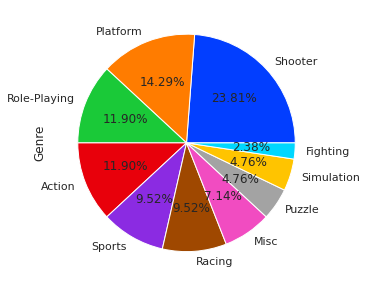

In [100]:
genre=popular_game['Genre'].value_counts()
plt.figure(figsize=(5,5))
genre.plot(kind='pie',autopct='%.2f%%')
plt.show()

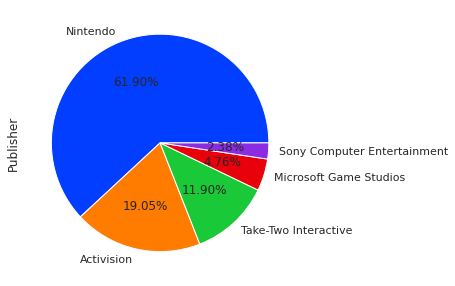

In [99]:
pub=popular_game['Publisher'].value_counts()
plt.figure(figsize=(5,5))
pub.plot(kind='pie',autopct='%.2f%%')
plt.show()

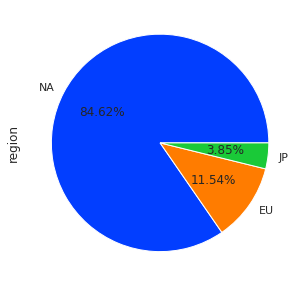

In [102]:
nin=popular_game[popular_game.Publisher=="Nintendo"]
nin_reg=nin['region'].value_counts()
plt.figure(figsize=(5,5))
nin_reg.plot(kind='pie',autopct='%.2f%%')
plt.show()

- 인기가 많은 게임의 데이터셋을 살펴본 결과, 'Nintendo' 회사에서 출시한 게임이 61.9%를 차지하고 있다는 사실을 알 수 있다.
- 인기가 많은 'Nintendo' 회사에서 출시된 게임은 북미(NA)지역에서의 출고량이 다른 지역보다 높은 경향이 있다.

### 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론
- 다음 분기: 2016년 이후 10년으로 설정했다.

In [86]:
next=game[game.Year >=2016].sort_values("Year").reset_index(drop=True)  #2016년~2020년 데이터셋
ex_n=game[(game.Year >= 2006) & (game.Year < 2016)].sort_values("Year").reset_index(drop=True)  #2006년~2015년 데이터셋
ex_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,region,total_Sales
0,Super Dragon Ball Z,PS2,2006,Fighting,Atari,0.09,0.07,0.19,0.02,JP,0.37
1,Yu-Gi-Oh! GX: Tag Force,PSP,2006,Strategy,Konami Digital Entertainment,0.09,0.03,0.00,0.02,NA,0.14
2,Sonic the Hedgehog,X360,2006,Platform,Sega,0.44,0.49,0.00,0.11,EU,1.04
3,MLB SlugFest 2006,XB,2006,Sports,Midway Games,0.04,0.01,0.00,0.00,NA,0.05
4,College Hoops 2K7,X360,2006,Sports,Take-Two Interactive,0.20,0.00,0.00,0.02,NA,0.22
...,...,...,...,...,...,...,...,...,...,...,...
9762,Pokemon Rumble World,3DS,2015,Action,Nintendo,0.00,0.01,0.08,0.00,JP,0.09
9763,Yuki Yuna is a Hero: Memory of the Forest,PSV,2015,Action,FuRyu,0.00,0.00,0.04,0.00,JP,0.04
9764,Battlefield: Hardline,PS3,2015,Shooter,Electronic Arts,0.12,0.23,0.07,0.07,EU,0.49
9765,Kurogane Kaikitan,PSV,2015,Adventure,Minato Station,0.00,0.00,0.01,0.00,JP,0.01


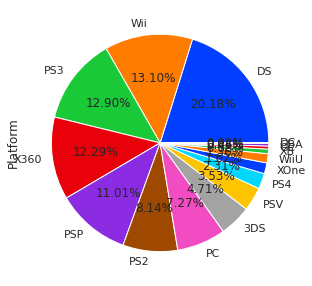

In [105]:
ex_n_P=ex_n['Platform'].value_counts()
plt.figure(figsize=(5,5))
ex_n_P.plot(kind='pie',autopct='%.2f%%')
plt.show()

- 2006년 ~ 2015년 기간동안 Platform의 비율

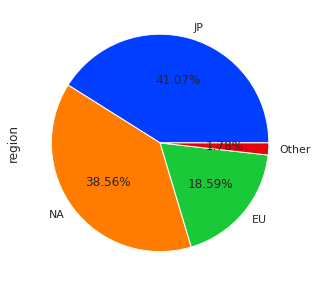

In [108]:
ex_PS=ex_n[ex_n['Platform'].str.contains("PS")]
ex_PS_reg=ex_PS['region'].value_counts()
plt.figure(figsize=(5,5))
ex_PS_reg.plot(kind='pie',autopct='%.2f%%')
plt.show()

- 2006년 ~ 2015년 데이터 중 Platform이 PS인 게임은 일본(JP)지역과 북미(NA)지역에서의 출고량이 다른 지역보다 많다.

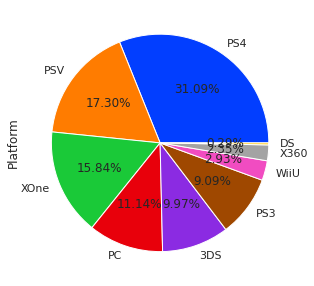

In [104]:
nextP=next['Platform'].value_counts()
plt.figure(figsize=(5,5))
nextP.plot(kind='pie',autopct='%.2f%%')
plt.show()

- 2016년 ~ 2020년 동안의 게임 출고량을 살펴보면 Platform이 PS인 비율이 상당한  것으로 보인다.
- 2006년 ~ 2015년의 결과를 기반으로 PS의 마케팅을 일본(JP)지역과 북미(NA)지역 위주로 진행하면 좋은 영향이 있을 것이다.

- 2020년 이후 코로나의 여파와 레트로의 열풍으로 인해 'Nintendo'의 재유행이 일어날 것으로 보인다.
- Nintendo 게임은 북미(NA)지역에서의 인기가 좋았기 때문에 북미지역에 맞는 마케팅을 진행하면 판매량에 좋은 영향을 줄 것으로 보인다.